## 1차 과제

- 데이터: 2018 사교육비 총조사

https://mdis.kostat.go.kr/ofrData/selectOfrDataDetail.do?survId=95&itmDiv=1&nPage=3&itemId=2008&itemNm=

- 제출 양식: 이름_n차_과제.ipynb
- 사용 라이브러리: pandas, numpy, matplotlib, seaborn, OneHotEncoder

**코드형태로 되어 있는 컬럼의 경우 파일설계서를 참고하시기 바랍니다.**

### 1. 데이터 불러오기

1.1 사용할 라이브러리와 데이터를 불러오고 앞 10개의 데이터만 출력하세요.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [81]:
df=pd.read_csv("/content/drive/MyDrive/사교육비조사.csv",encoding='cp949')

In [82]:
df.head(10)

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
0,1,11,1,1,0.333333,0.0,6.333333,4.333333,2.000000,392.236071,2,NaN,51.0,31.0,1.0,5,1.0
1,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,51.0,41.0,3.0,3,1.0
2,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,1,NaN,61.0,51.0,1.0,6,1.0
3,1,11,1,1,0.666667,0.0,0.000000,0.000000,0.000000,0.000000,2,NaN,64.0,51.0,3.0,8,1.0
4,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,188.862467,3,NaN,51.0,51.0,3.0,4,1.0
5,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,23.607808,2,NaN,71.0,51.0,1.0,4,3.0
6,1,11,1,1,0.666667,0.0,1.000000,0.000000,1.000000,39.619805,2,NaN,51.0,41.0,1.0,2,1.0
7,1,11,1,1,0.666667,0.0,1.000000,1.000000,0.000000,64.921473,1,NaN,31.0,31.0,1.0,2,1.0
8,1,11,1,1,0.666667,0.0,1.333333,0.000000,1.333333,118.039042,1,NaN,51.0,51.0,1.0,3,8.0
9,1,11,1,1,0.666667,0.0,10.333333,10.333333,0.000000,360.806005,3,NaN,41.0,51.0,3.0,2,1.0


1.2 불러온 데이터의 요약 정보를 출력하세요.

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75785 entries, 0 to 75784
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지역구분코드        75785 non-null  int64  
 1   행정구역시도코드      75785 non-null  int64  
 2   학교급구분코드       75785 non-null  int64  
 3   방과후학교참여여부     75785 non-null  int64  
 4   방과후학교참여시간수    75785 non-null  float64
 5   EBS교재비        75785 non-null  float64
 6   사교육참여시간수      75785 non-null  float64
 7   일반교과사교육시간수    75785 non-null  float64
 8   예체능사교육시간수     75785 non-null  float64
 9   사교육비총비용       75785 non-null  float64
 10  총자녀수          75785 non-null  int64  
 11  학생성적구분코드      36479 non-null  float64
 12  부_교육정도코드      71582 non-null  float64
 13  모_교육정도코드      72712 non-null  float64
 14  부모경제활동코드      75440 non-null  float64
 15  월평균가구소득코드     75785 non-null  int64  
 16  진학희망고등학교유형코드  39306 non-null  float64
dtypes: float64(11), int64(6)
memory usage: 9.8 MB


1.2 데이터의 기술통계량을 출력하세요.

In [84]:
df.describe()

,지역구분코드,행정구역시도코드,학교급구분코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
count,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,75785.000000,36479.000000,71582.000000,72712.000000,75440.000000,75785.000000,39306.000000
mean,2.626654,27.592188,2.309006,1.453982,2.609993,3.599502,5.669939,4.002366,1.607508,346.718328,2.163766,3.178486,43.391872,41.457572,2.287354,4.298080,1.958709
std,0.955592,8.542575,0.947334,0.497881,3.764333,9.634226,6.230053,5.357766,3.557269,407.001971,0.721118,1.248837,11.510979,10.592290,0.950272,2.116495,1.578397
min,1.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8.000000,8.000000,1.000000,1.000000,1.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,31.000000,31.000000,1.000000,3.000000,1.000000
50%,3.000000,31.000000,2.000000,1.000000,1.000000,0.000000,4.000000,1.000000,0.000000,236.078084,2.000000,3.000000,41.000000,41.000000,3.000000,4.000000,1.000000
75%,3.000000,35.000000,3.000000,2.000000,4.000000,0.000000,10.000000,7.000000,1.666667,563.046231,3.000000,4.000000,51.000000,51.000000,3.000000,6.000000,3.000000
max,4.000000,39.000000,4.000000,2.000000,40.000000,198.260065,82.333333,76.000000,60.000000,5374.156458,11.000000,5.000000,75.000000,75.000000,4.000000,8.000000,8.000000


### 2. EDA 및 전처리

2.1 해당 데이터는 초중고 학생이 모두 들어있는 데이터로 보다 명확한 분석을 위해 고등학생만을 대상으로 분석합니다.

이를 위해 학교급구분코드가 3(고등학생)인 데이터만 남기도록 하고 몇개의 데이터가 남았는지 확인 후 학교급구분코드 컬럼을 삭제하세요.

In [85]:
df2=df[df['학교급구분코드']==3]
df2.shape

(30052, 17)

In [86]:
df3=df2.drop(['학교급구분코드'],axis=1)
df3

,지역구분코드,행정구역시도코드,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,11,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,11,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,4,39,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,4,39,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,4,39,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,4,39,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.2 지역구분코드와 행정구역시도코드를 삭제하세요(분석에 필요할 것으로 보이나 현재는 편의상 삭제).

In [87]:
df4=df3.drop(['지역구분코드','행정구역시도코드'],axis=1)
df4

,방과후학교참여여부,방과후학교참여시간수,EBS교재비,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드
4920,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN
4921,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN
4922,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN
4923,1,0.333333,0.000000,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN
4924,1,0.333333,0.000000,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,2,0.000000,21.652747,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN
75679,2,0.000000,3.936863,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN
75680,2,0.000000,3.936863,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN
75681,2,0.000000,7.873726,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN


2.3 방과후학교참여여부에 속한 값들의 개수를 확인하고 One Hot Encoding을 통해 1과 2를 각각 참여, 미참여의 dummy variable로 만드세요.

In [88]:
df4['방과후학교참여여부'].value_counts()

1    18498
2    11554
Name: 방과후학교참여여부, dtype: int64

In [89]:
df5=pd.get_dummies(df4['방과후학교참여여부'])
df6=pd.concat([df4,df5],axis=1)

In [90]:
df6=df6.rename(columns={1:'참여',2:'미참여'})
df7=df6.drop(columns=['방과후학교참여여부'])

2.4 EBS교재비의 경우 0값이 절반 이상이므로 모델 성능에 영향을 미칠 수 있기에 삭제하겠습니다.

In [91]:
df7=df7.drop(columns=['EBS교재비'])

In [92]:
df7

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여
4920,0.333333,0.0,0.0,0.0,0.000000,1,2.0,71.0,61.0,2.0,4,NaN,1,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,3.0,51.0,51.0,3.0,6,NaN,1,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,5.0,31.0,41.0,3.0,4,NaN,1,0
4923,0.333333,0.0,0.0,0.0,0.000000,2,5.0,51.0,51.0,3.0,1,NaN,1,0
4924,0.333333,12.0,12.0,0.0,2203.395453,2,4.0,71.0,62.0,1.0,8,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,5.0,51.0,31.0,3.0,4,NaN,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,5.0,41.0,31.0,3.0,6,NaN,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,5.0,51.0,51.0,3.0,8,NaN,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,1.0,51.0,63.0,3.0,5,NaN,0,1


2.5 학생성적구분코드에 따른 사교육비총비용의 분포를 BoxPlot으로 나타내세요.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

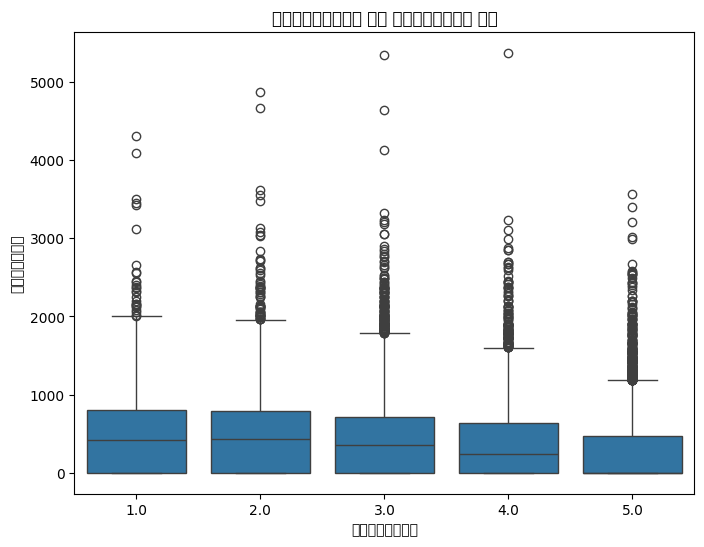

In [93]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='학생성적구분코드',y='사교육비총비용',data=df7)
plt.title('학생성적구분코드에 따른 사교육비총비용의 분포')
plt.xlabel('학생성적구분코드')
plt.ylabel('사교육비총비용')
plt.show()

2.6 학생성적구분코드에 속한 값들의 밸런스를 확인해봤을 때 중위값이 과도하게 많으므로 1, 2를 상위, 4, 5를 하위로 묶은 후 One Hot Encoding을 통해 dummy variable로 변환하세요.

In [94]:
df7['학생성적구분코드'].value_counts()

3.0    9032
2.0    6079
4.0    6020
5.0    5813
1.0    3108
Name: 학생성적구분코드, dtype: int64

In [95]:
df7['학생성적구분코드']=df7['학생성적구분코드'].replace({1:'상위',2:'상위',3:'중위',4:'하위',5:'하위'})

In [96]:
df8=pd.get_dummies(df7['학생성적구분코드'])
df9=pd.concat([df7,df8],axis=1)
df9

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,학생성적구분코드,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,상위,중위,하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,상위,71.0,61.0,2.0,4,NaN,1,0,1,0,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,중위,51.0,51.0,3.0,6,NaN,1,0,0,1,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,하위,31.0,41.0,3.0,4,NaN,1,0,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,하위,51.0,51.0,3.0,1,NaN,1,0,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,하위,71.0,62.0,1.0,8,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,하위,51.0,31.0,3.0,4,NaN,0,1,0,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,하위,41.0,31.0,3.0,6,NaN,0,1,0,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,하위,51.0,51.0,3.0,8,NaN,0,1,0,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,상위,51.0,63.0,3.0,5,NaN,0,1,1,0,0


In [97]:
df9=df9.drop(columns=['학생성적구분코드'])
df9

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,참여,미참여,상위,중위,하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,1,0,1,0,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,1,0,0,1,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,1,0,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,1,0,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,0,1,0,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,0,1,0,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,0,1,0,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,0,1,1,0,0


2.7 Label Encoding과 One Hot Encoding의 차이에 대해 서술하세요.

A: Label Encoding은 범주형 데이터를 숫자로 매핑하는 데 사용되며, 예를 들어 A,B,C가 있으면 0,1,2 이런 식으로 순차적으로 숫자를 부여한다. One Hot Encoding은 범주형 데이터를 이진형태로 바꾸는 데 사용되며, 예를 들어 '성별' 열에 남자와 여자 데이터가 있으면 원핫인코딩 후 남자, 여자 열이 새롭게 생성이 되고 해당 데이터에 해당하면 1, 해당하지 않으면 0을 부여한다.

2.8 dummy variable로 변환된 기존 변수와 dummy variable 중 하나를 삭제하겠습니다(다중공선성 문제).

In [98]:
# dummy variable로 변환된 기존 변수는 위에서 제거함
data=df9.drop(columns=['참여'])
data

,방과후학교참여시간수,사교육참여시간수,일반교과사교육시간수,예체능사교육시간수,사교육비총비용,총자녀수,부_교육정도코드,모_교육정도코드,부모경제활동코드,월평균가구소득코드,진학희망고등학교유형코드,미참여,상위,중위,하위
4920,0.333333,0.0,0.0,0.0,0.000000,1,71.0,61.0,2.0,4,NaN,0,1,0,0
4921,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,6,NaN,0,0,1,0
4922,0.333333,0.0,0.0,0.0,0.000000,2,31.0,41.0,3.0,4,NaN,0,0,0,1
4923,0.333333,0.0,0.0,0.0,0.000000,2,51.0,51.0,3.0,1,NaN,0,0,0,1
4924,0.333333,12.0,12.0,0.0,2203.395453,2,71.0,62.0,1.0,8,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75678,0.000000,0.0,0.0,0.0,0.000000,1,51.0,31.0,3.0,4,NaN,1,0,0,1
75679,0.000000,0.0,0.0,0.0,0.000000,4,41.0,31.0,3.0,6,NaN,1,0,0,1
75680,0.000000,0.0,0.0,0.0,105.000000,3,51.0,51.0,3.0,8,NaN,1,0,0,1
75681,0.000000,0.0,0.0,0.0,112.500000,2,51.0,63.0,3.0,5,NaN,1,1,0,0


2.9 다중공선성 문제가 무엇인지 작성하고 왜 이것이 One Hot Encoding의 dummy variable과 관련 있는지 작성하세요.

A: 다중공선성이란 독립변수간의 강한 상관관계가 나타나는 문제이다. 상관관계가 높으면 회귀계수의 추정이 불안정하고 모델이 잘 예측되지 않을 수 있다. 원핫인코딩을 통해 더미변수를 생성하면 다중공선성 문제가 발생하는데, 더미변수들간의 선형 종속성 때문이다. 그렇기 때문에 더미변수를 생성하고 다중공선성 문제를 해결하기 위해 더미변수 중 하나를 제거해야 한다.

2.10 사교육참여시간수, 일반교과사교육시간수, 예체능사교육시간수의 상관 관계를 Heatmap으로 시각화하세요.

In [99]:
data2=data[['사교육참여시간수','일반교과사교육시간수','예체능사교육시간수']]

In [100]:
cor=data2.corr()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50977 (\N{HANGUL SYLLABLE YUG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 52280 (\N{HANGUL SYLLABLE CAM}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/

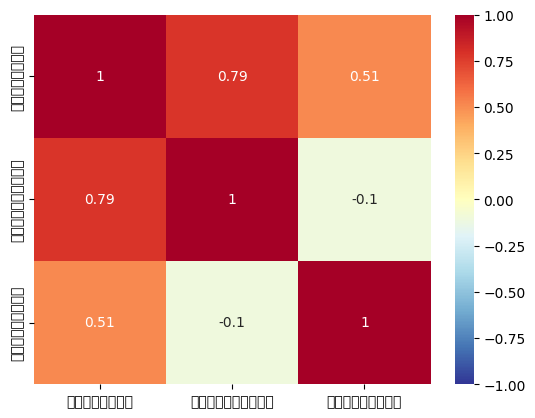

In [101]:
sns.heatmap(cor, cmap = 'RdYlBu_r', annot = True, vmin = -1,vmax = 1)
plt.show()

2.11 이후 자유롭게 데이터를 살펴보고 전처리를 진행하세요.

In [102]:
dt=pd.get_dummies(data['부모경제활동코드'])
data=pd.concat([data,dt],axis=1)

In [103]:
data=data.drop(columns='부모경제활동코드')

In [104]:
data=data.rename(columns={1:'아버지',2:'어머니',3:'모두참여',4:'모두미참여'})

In [110]:
data=data.fillna(0)

In [111]:
data.isnull().sum()

방과후학교참여시간수      0
사교육참여시간수        0
일반교과사교육시간수      0
예체능사교육시간수       0
사교육비총비용         0
총자녀수            0
부_교육정도코드        0
모_교육정도코드        0
월평균가구소득코드       0
진학희망고등학교유형코드    0
미참여             0
상위              0
중위              0
하위              0
아버지             0
어머니             0
모두참여            0
모두미참여           0
dtype: int64

In [112]:
X = data.drop('사교육비총비용',axis=1)
y = data['사교육비총비용']

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 예를 들어, X는 독립 변수, y는 종속 변수(타깃)라고 가정
# X_train, X_test, y_train, y_test를 데이터에 따라 설정
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 변수 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 분석

3.1 전처리가 완료된 데이터를 통해 분석을 진행하세요.

- target variable은 사교육비총비용
- 최소 2개의 모델 사용
- 위에서 진행한 전처리 방식과 달라도 무방(단, 전처리 과정에 대한 서술 필요)

In [114]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [115]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test_scaled) # 예측 값
mean_squared_error(y_pred, y_test, squared = False)

304.679806669909

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}

rf = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': (5, 8), 'min_samples_leaf': (8, 18),
                         'min_samples_split': (8, 16),
                         'n_estimators': (100, 200)})

In [117]:
print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최적 예측 정확도: 0.7046


In [118]:
rf = RandomForestRegressor(random_state=42, max_depth=8, min_samples_leaf=18, min_samples_split=16,n_estimators=200)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=18, min_samples_split=16,
                      n_estimators=200, random_state=42)

In [119]:
y_pred = rf.predict(X_test_scaled) # 예측 값
mean_squared_error(y_pred, y_test, squared = False)

269.1250377254801